### Importing Training and Testing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('data/aps_failure_training_set.csv', skiprows=20, na_values='na')
train_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [3]:
test_df = pd.read_csv('data/aps_failure_test_set.csv', skiprows=20, na_values='na')
test_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


In [4]:
target_distribution = train_df['class'].value_counts()
print("Target variable distribution:\n", target_distribution)

Target variable distribution:
 class
neg    59000
pos     1000
Name: count, dtype: int64


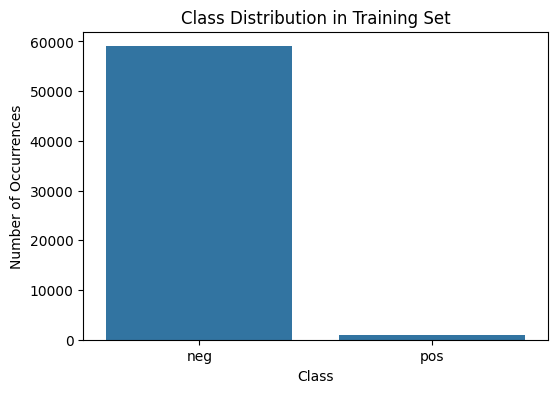

In [5]:
plt.figure(figsize=(6, 4))
sns.barplot(x=target_distribution.index, y=target_distribution.values)
plt.title('Class Distribution in Training Set')
plt.ylabel('Number of Occurrences')
plt.xlabel('Class')
plt.show()

There is no null value in the target variables. There will be potential imbalance classification issue during modelling that need to be catered later

### Data Processing

##### Check for null value percentage per column

In [6]:
missing_percentage = train_df.isnull().sum() / len(train_df)
missing_percentage.sort_values(ascending=False)

br_000    0.821067
bq_000    0.812033
bp_000    0.795667
bo_000    0.772217
ab_000    0.772150
            ...   
cj_000    0.005633
ci_000    0.005633
bt_000    0.002783
aa_000    0.000000
class     0.000000
Length: 171, dtype: float64

##### There are columns with missing value above 30% considered high. These columns need to be dropped as imputing values will cause drastic drift in the variance of the data and cause information modification

In [7]:
cols_to_drop = missing_percentage[missing_percentage > 0.3].keys()

train_df_processed = train_df.drop(columns=cols_to_drop)
test_df_processed = test_df.drop(columns=cols_to_drop)

print(f"Columns dropped: {list(cols_to_drop)}")
print(f"New shape of training data: {train_df_processed.shape}")
print(f"New shape of test data: {test_df_processed.shape}")

Columns dropped: ['ab_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'cr_000']
New shape of training data: (60000, 161)
New shape of test data: (16000, 161)


##### Imputing the remaining of null values (columns with less than 30% null)

For simplicity, median will be used. the rationale behind it is this kind of data usually skewed by outliers or minority data considering the imbalance classification thus using median is the right approach for simplicity and robustness to outliers compared to the mean.

In [8]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

X_train = train_df_processed.drop('class', axis=1)
y_train = train_df_processed['class']

X_train_imputed = imputer.fit_transform(X_train)
X_train_imputed

array([[7.66980000e+04, 2.13070644e+09, 2.80000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.30580000e+04, 0.00000000e+00, 1.26000000e+02, ...,
        1.50000000e+03, 0.00000000e+00, 0.00000000e+00],
       [4.10400000e+04, 2.28000000e+02, 1.00000000e+02, ...,
        5.14000000e+02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.12000000e+02, 2.13070643e+09, 1.80000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.02920000e+04, 2.13070643e+09, 4.94000000e+02, ...,
        3.88422000e+05, 0.00000000e+00, 0.00000000e+00],
       [4.02220000e+04, 6.98000000e+02, 6.28000000e+02, ...,
        1.58000000e+02, 0.00000000e+00, 0.00000000e+00]])

In [9]:
X_test = test_df_processed.drop('class', axis=1)
y_test = test_df_processed['class']

X_test_imputed = imputer.transform(X_test)
X_test_imputed

array([[6.0000e+01, 2.0000e+01, 1.2000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [8.2000e+01, 6.8000e+01, 4.0000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [6.6002e+04, 2.1200e+02, 1.1200e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [7.9636e+04, 1.6700e+03, 1.5180e+03, ..., 1.9548e+04, 0.0000e+00,
        0.0000e+00],
       [1.1000e+02, 3.6000e+01, 3.2000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [8.0000e+00, 6.0000e+00, 4.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [10]:
X_train_processed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_processed = pd.DataFrame(X_test_imputed, columns=X_test.columns)

print("Total missing values in processed training data:", X_train_processed.isnull().sum().sum())
print("Total missing values in processed test data:", X_test_processed.isnull().sum().sum())

Total missing values in processed training data: 0
Total missing values in processed test data: 0


##### Encode target variable to 0 (neg) and 1 (pos)

In [11]:
y_train_encoded = y_train.map({'neg': 0, 'pos': 1})
y_test_encoded = y_test.map({'neg': 0, 'pos': 1})

print("Unique value in training target variables", y_train_encoded.unique())
print("Unique value in testing target variables", y_test_encoded.unique())

Unique value in training target variables [0 1]
Unique value in testing target variables [0 1]


### Exploratory Data Analysis

In [ ]:
def plot_distribution_by_class(x: pd.Series, y: pd.Series):
    """
    Generates and displays a single distribution plot for a feature,
    comparing its distribution across the target classes.

    Args:
        x (pd.Series): A pandas Series containing the feature data.
        y (pd.Series): A pandas Series containing the encoded target data (0s and 1s).
    """
    # Combine the feature and target into a temporary DataFrame for plotting
    temp_df = pd.DataFrame({'feature': x, 'class': y})

    # Add a small constant to the feature to handle log(0) cases,
    temp_df['feature'] = temp_df['feature'] + 1e-6

    # Create the plot
    plt.figure(figsize=(10, 6))
    ax = sns.kdeplot(data=temp_df, x='feature', hue='class',
                     fill=True, common_norm=False, palette='viridis', log_scale=True)

    feature_name = x.name or 'Feature'
    ax.set_title(f'Distribution of {feature_name} by Class', fontsize=16)
    ax.set_xlabel(f'{feature_name} value (log scale)', fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    ax.legend(title='Class', labels=['1 (pos)', '0 (neg)'])
    plt.show()

--- Plotting for feature: aa_000 ---


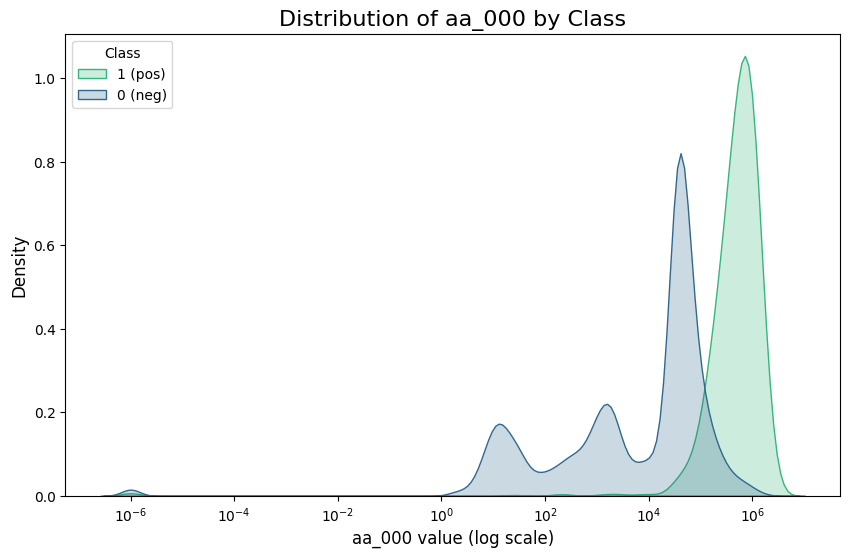

--- Plotting for feature: ac_000 ---


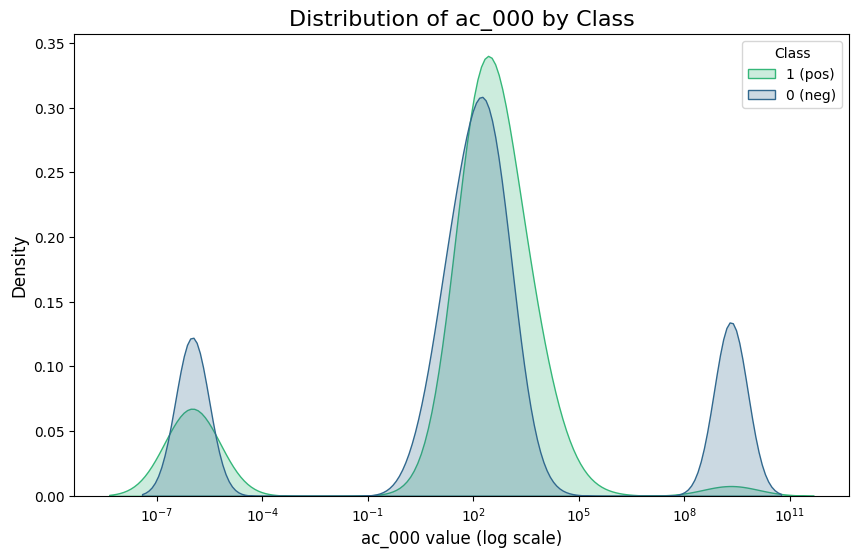

--- Plotting for feature: ad_000 ---


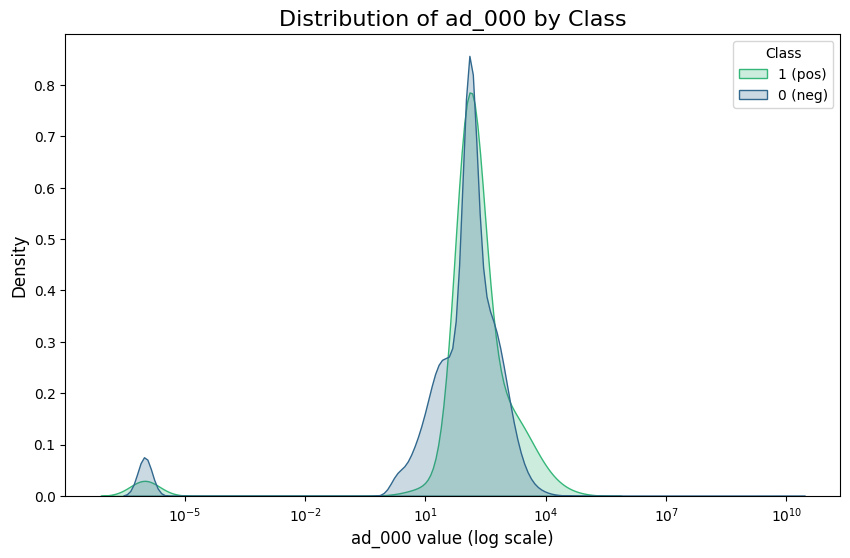

--- Plotting for feature: ae_000 ---


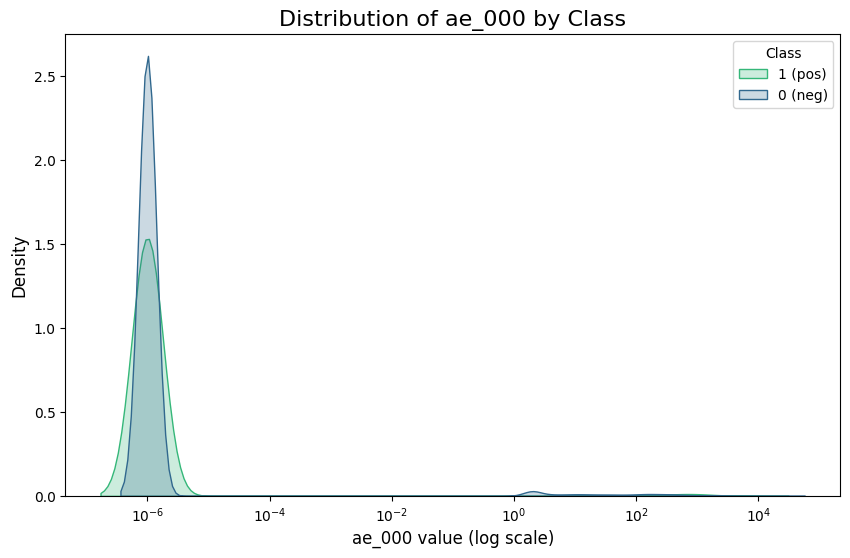

--- Plotting for feature: af_000 ---


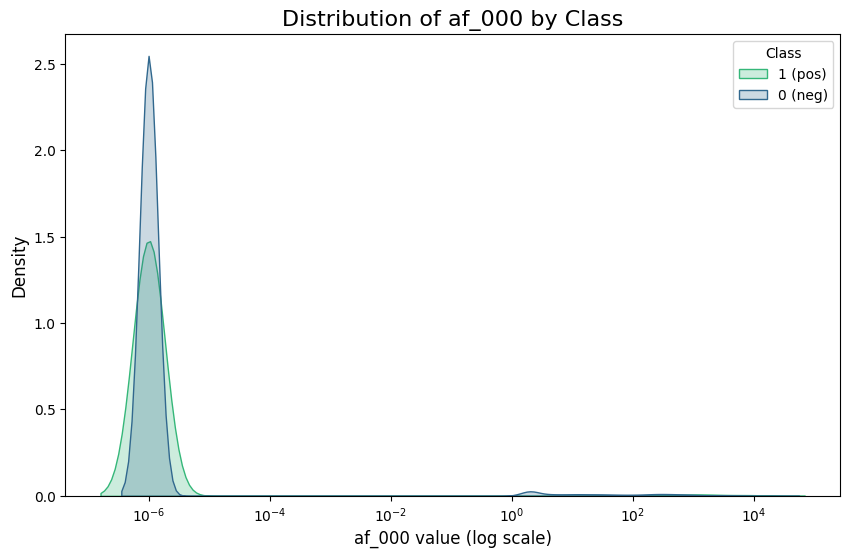

In [13]:
features_to_plot = X_train_processed.columns[:5]

for feature in features_to_plot:
    print(f'--- Plotting for feature: {feature} ---')
    plot_distribution_by_class(
        x=X_train_processed[feature],
        y=y_train
    )

This is the plots of the first 5 features. Since we have 161 features, visually look on 1 by 1 will be exhaustive. Using distribution plot we can see whether there is difference between class pos and neg for one particle variable. The difference will be more significant if the x-axis shift between pos (green) and neg (blue) plot is different as for example in predictor aa_000. This tells the predictor is a good high correlate predictor as it can tell different between the 2 classes.

### Correlation Analysis (Features selection)

In [ ]:
from scipy.stats import pointbiserialr

def perform_correlation_analysis(X: pd.DataFrame, y: pd.Series, p_value_threshold: float = 0.05) -> list:
    """
    Performs Point-Biserial correlation testing for each numerical feature in a
    DataFrame against a binary target Series.

    It reports the correlation coefficient and p-value for each feature and
    returns a list of features that are statistically significant.

    Args:
        X (pd.DataFrame): DataFrame containing the numerical feature columns.
        y (pd.Series): Series containing the binary target variable (0s and 1s).
        p_value_threshold (float): The significance level to determine which
                                   features are considered correlated. Defaults to 0.05.

    Returns:
        list: A list of column names from X that have a p-value less than
              the specified threshold.
    """
    if not isinstance(X, pd.DataFrame):
        raise TypeError("X must be a pandas DataFrame.")
    if not isinstance(y, pd.Series):
        raise TypeError("y must be a pandas Series.")

    results = []
    significant_cols = []

    print("--- Correlation Analysis Report ---")
    print(f"Significance Threshold (p-value): {p_value_threshold}\n")

    for col in X.columns:
        if X[col].isnull().any() or y.isnull().any():
            print(f"Skipping '{col}' due to missing values. Please impute first.")
            continue

        corr, p_value = pointbiserialr(X[col], y)
        results.append({
            'Feature': col,
            'Correlation': corr,
            'P-Value': p_value
        })

        if p_value < p_value_threshold:
            significant_cols.append(col)

    results_df = pd.DataFrame(results).sort_values(by='P-Value', ascending=True)
    print(results_df.to_string())

    print(f"\n--- Summary ---")
    print(f"Found {len(significant_cols)} statistically significant features.")

    return significant_cols

In [15]:
significant_features = perform_correlation_analysis(X_train_processed, y_train_encoded, p_value_threshold=0.05)
print(significant_features)

--- Correlation Analysis Report ---
Significance Threshold (p-value): 0.05

    Feature  Correlation        P-Value
0    aa_000     0.536978   0.000000e+00
98   cn_008     0.184861   0.000000e+00
97   cn_007     0.187496   0.000000e+00
96   cn_006     0.195145   0.000000e+00
95   cn_005     0.371189   0.000000e+00
94   cn_004     0.473823   0.000000e+00
93   cn_003     0.406036   0.000000e+00
92   cn_002     0.367792   0.000000e+00
91   cn_001     0.390680   0.000000e+00
90   cn_000     0.231827   0.000000e+00
89   cm_000     0.310299   0.000000e+00
88   cl_000     0.161367   0.000000e+00
87   ck_000     0.464198   0.000000e+00
86   cj_000     0.306871   0.000000e+00
85   ci_000     0.550386   0.000000e+00
81   ce_000     0.180582   0.000000e+00
75   by_000     0.500145   0.000000e+00
74   bx_000     0.505529   0.000000e+00
73   bv_000     0.529329   0.000000e+00
72   bu_000     0.529329   0.000000e+00
71   bt_000     0.534286   0.000000e+00
70   bs_000     0.181807   0.000000e+00
69  

c:\Users\User\miniconda3\envs\boost\Lib\site-packages\scipy\stats\_stats_py.py:5534: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)


These are the 147 out of 161 features that are significance to the target variable. Removing uncorrelated variables will definitely help in making the model smarter. However, seems like the dimension still high at 147, during the modelling we need to select only model that known for good in handling high dimension data.

### Model Training

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [17]:
def plot_confusion_matrix(cm, model_name):
    """
    Creates and displays a heatmap for a given confusion matrix.
    """
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Neg', 'Predicted Pos'],
                yticklabels=['Actual Neg', 'Actual Pos'])
    plt.title(f'Confusion Matrix for {model_name} on Test Set')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

##### Define a total_cost formula to calculate the cost

In [ ]:
def total_cost(y_true, y_pred):
    """Calculates the total cost based on the competition's metric."""
    # Get the confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()
    
    # Cost_1 = 10 for False Positives, Cost_2 = 500 for False Negatives
    cost = (10 * fp) + (500 * fn)
    return cost

# Create a scorer that GridSearchCV can use.
cost_scorer = make_scorer(total_cost, greater_is_better=False)

Stratified k-Fold is used to make sure every fold during training have both of classes considering the severe imbalance problem on the target.

In [39]:
# --- Set up Cross-Validation ---
# Use StratifiedKFold to maintain the class ratio in each fold.
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=79)

In [18]:
results = []
test_summary_results = []

##### Model 1: Logistic Regression

Decided to postpone this model for now due to time consuming when training on high dimension and high sampling. I might need to attempt PCA to reduce the dimensionality or sampling on the data. Additionally, logistic regression is a simple model yet need some experimental on the data transformation before feeding data to the model as it has several assumptions that need to be handled. Without this I highly doubt we can achieve a good score.

In [20]:
# print("----- Tuning Model: Logistic Regression -----")

# # The 'class_weight' parameter is key for handling imbalance
# lr_model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=79, max_iter=1000)

# # Define a simple grid for the regularization parameter 'C'
# lr_param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100]
# }

# # Set up GridSearchCV
# lr_grid_search = GridSearchCV(
#     estimator=lr_model,
#     param_grid=lr_param_grid,
#     scoring=cost_scorer,
#     cv=kfold,
#     n_jobs=-1,
#     verbose=1
# )

# # Run the search
# lr_grid_search.fit(X_train_processed, y_train_encoded)

# # Store results for final summary
# results = []
# best_lr_cost = -lr_grid_search.best_score_
# results.append({
#     'Model': 'Logistic Regression',
#     'Best Score (Cost)': best_lr_cost,
#     'Best Params': lr_grid_search.best_params_
# })

# print(f"\nBest Parameters: {lr_grid_search.best_params_}")
# print(f"Best Cross-Validation Score (Lowest Cost): {best_lr_cost:.2f}")

In [21]:
# print("----- Evaluating Best Logistic Regression Model on the Test Set -----")
# best_lr_model = lr_grid_search.best_estimator_
# y_pred_test_lr = best_lr_model.predict(X_test_processed)

# final_test_cost_lr = total_cost(y_test_encoded, y_pred_test_lr)
# final_cm_lr = confusion_matrix(y_test_encoded, y_pred_test_lr, labels=[0, 1])

# print(f"\n**Final Cost on Test Set: {final_test_cost_lr}**")
# print("\nTest Set Classification Report:")
# print(classification_report(y_test_encoded, y_pred_test_lr))

# plot_confusion_matrix(final_cm_lr, "Logistic Regression")
# test_summary_results = [{
#     'Model': 'Logistic Regression', 
#     'Test Set Cost': final_test_cost_lr, 
#     'False Positives (FP)': final_cm_lr[0, 1], 
#     'False Negatives (FN)': final_cm_lr[1, 0]}]

##### Model 2: Random Forest

In [22]:
print("\n----- Tuning Model: Random Forest -----")

# Use 'class_weight' to handle the imbalanced classes
rf_model = RandomForestClassifier(class_weight='balanced_subsample', random_state=79)

# Define a grid for key hyperparameters
rf_param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 15, 20, 25]
}

# Set up GridSearchCV
rf_grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    scoring=cost_scorer,
    cv=kfold,
    n_jobs=-1,
    verbose=1
)

# Run the search
rf_grid_search.fit(X_train_processed, y_train_encoded)

best_rf_cost = -rf_grid_search.best_score_
results.append({
    'Model': 'Random Forest',
    'Best Score (Cost)': best_rf_cost,
    'Best Params': rf_grid_search.best_params_
})

print(f"\nBest Parameters: {rf_grid_search.best_params_}")
print(f"Best Cross-Validation Score (Lowest Cost): {best_rf_cost:.2f}")


----- Tuning Model: Random Forest -----
Fitting 10 folds for each of 15 candidates, totalling 150 fits



Best Parameters: {'max_depth': 5, 'n_estimators': 500}
Best Cross-Validation Score (Lowest Cost): 5375.00


----- Evaluating Best Random Forest Model on the Test Set -----

**Final Cost on Test Set: 11740**

Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15625
           1       0.37      0.97      0.53       375

    accuracy                           0.96     16000
   macro avg       0.68      0.97      0.76     16000
weighted avg       0.98      0.96      0.97     16000



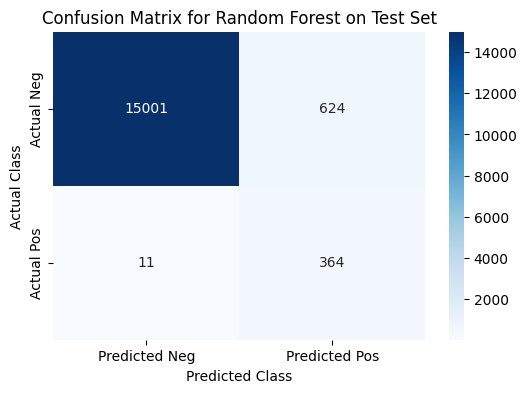

In [23]:
print("----- Evaluating Best Random Forest Model on the Test Set -----")
best_rf_model = rf_grid_search.best_estimator_
y_pred_test_rf = best_rf_model.predict(X_test_processed)

final_test_cost_rf = total_cost(y_test_encoded, y_pred_test_rf)
final_cm_rf = confusion_matrix(y_test_encoded, y_pred_test_rf, labels=[0, 1])

print(f"\n**Final Cost on Test Set: {final_test_cost_rf}**")
print("\nTest Set Classification Report:")
print(classification_report(y_test_encoded, y_pred_test_rf))

plot_confusion_matrix(final_cm_rf, "Random Forest")
test_summary_results.append({
    'Model': 'Random Forest', 
    'Test Set Cost': final_test_cost_rf, 
    'False Positives (FP)': final_cm_rf[0, 1], 
    'False Negatives (FN)': final_cm_rf[1, 0]})

Random Forest achieve a good result with cost at 11740 on par with the past usage.

##### Model 3: XGBoost

In [24]:
print("\n----- Tuning Model: XGBoost -----")

# Calculate the ratio for 'scale_pos_weight'
pos_weight_ratio = 59000 / 1000

xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=79)

# Define a grid, including the crucial 'scale_pos_weight'
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.05, 0.1, 0.3],
    'scale_pos_weight': [pos_weight_ratio, 75]
}

# Set up GridSearchCV
xgb_grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_param_grid,
    scoring=cost_scorer,
    cv=kfold,
    n_jobs=-1,
    verbose=1
)

# Run the search
xgb_grid_search.fit(X_train_processed, y_train_encoded)

best_xgb_cost = -xgb_grid_search.best_score_
results.append({
    'Model': 'XGBoost',
    'Best Score (Cost)': best_xgb_cost,
    'Best Params': xgb_grid_search.best_params_
})

print(f"\nBest Parameters: {xgb_grid_search.best_params_}")
print(f"Best Cross-Validation Score (Lowest Cost): {best_xgb_cost:.2f}")


----- Tuning Model: XGBoost -----
Fitting 10 folds for each of 48 candidates, totalling 480 fits


c:\Users\User\miniconda3\envs\boost\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:46:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'scale_pos_weight': 75}
Best Cross-Validation Score (Lowest Cost): 4356.00


----- Evaluating Best XGBoost Model on the Test Set -----

**Final Cost on Test Set: 10940**

Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     15625
           1       0.42      0.97      0.59       375

    accuracy                           0.97     16000
   macro avg       0.71      0.97      0.79     16000
weighted avg       0.99      0.97      0.97     16000



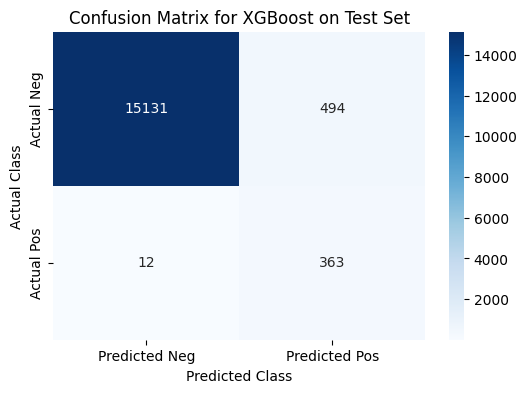

In [25]:
print("----- Evaluating Best XGBoost Model on the Test Set -----")
best_xgb_model = xgb_grid_search.best_estimator_
y_pred_test_xgb = best_xgb_model.predict(X_test_processed)

final_test_cost_xgb = total_cost(y_test_encoded, y_pred_test_xgb)
final_cm_xgb = confusion_matrix(y_test_encoded, y_pred_test_xgb, labels=[0, 1])
print(f"\n**Final Cost on Test Set: {final_test_cost_xgb}**")
print("\nTest Set Classification Report:")
print(classification_report(y_test_encoded, y_pred_test_xgb))

plot_confusion_matrix(final_cm_xgb, "XGBoost")
test_summary_results.append({
    'Model': 'XGBoost', 
    'Test Set Cost': final_test_cost_xgb, 
    'False Positives (FP)': final_cm_xgb[0, 1], 
    'False Negatives (FN)': final_cm_xgb[1, 0]})

XGBoost achieve better score than Random forest at 10940 score.

Model 4: LightGBM 

In [31]:
print("\n----- Tuning Model: LightGBM -----")

# We can use 'scale_pos_weight' just like in XGBoost to handle the imbalance
pos_weight_ratio = 59000 / 1000

lgb_model = LGBMClassifier(objective='binary', random_state=79, n_jobs=-1)

# Define a grid for key hyperparameters
# 'num_leaves' is a key parameter for LightGBM's performance
lgb_param_grid = {
    'n_estimators': [150, 250],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 50],
    'scale_pos_weight': [pos_weight_ratio]
}

# Set up GridSearchCV
lgb_grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=lgb_param_grid,
    scoring=cost_scorer,
    cv=kfold,
    verbose=1
)

# Run the search
lgb_grid_search.fit(X_train_processed, y_train_encoded)

print("\n--- LightGBM Tuning Complete ---")
print(f"Best CV Score (Lowest Cost): {-lgb_grid_search.best_score_:.2f}")
print(f"Best Parameters Found: {lgb_grid_search.best_params_}")


----- Tuning Model: LightGBM -----
Fitting 10 folds for each of 8 candidates, totalling 80 fits
[LightGBM] [Info] Number of positive: 900, number of negative: 53100
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36816
[LightGBM] [Info] Number of data points in the train set: 54000, number of used features: 157
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016667 -> initscore=-4.077537
[LightGBM] [Info] Start training from score -4.077537
[LightGBM] [Info] Number of positive: 900, number of negative: 53100
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023623 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36801
[LightGBM] [Info] Number of data points in the train set: 54000, number of used features: 157
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0

----- Evaluating Best LightGBM Model on the Test Set -----

**Final Cost on Test Set: 21770**

Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15625
           1       0.72      0.89      0.80       375

    accuracy                           0.99     16000
   macro avg       0.86      0.94      0.90     16000
weighted avg       0.99      0.99      0.99     16000



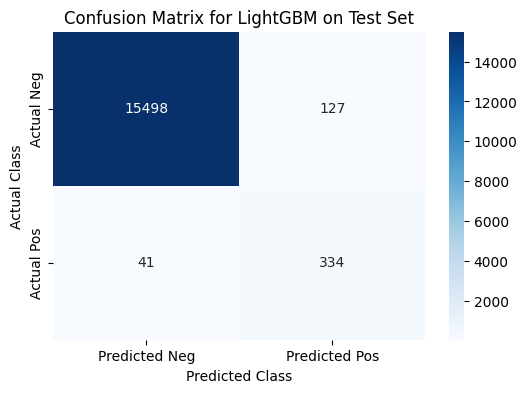

In [32]:
print("----- Evaluating Best LightGBM Model on the Test Set -----")

best_lgb_model = lgb_grid_search.best_estimator_
y_pred_test_lgb = best_lgb_model.predict(X_test_processed)

final_test_cost_lgb = total_cost(y_test_encoded, y_pred_test_lgb)
final_cm_lgb = confusion_matrix(y_test_encoded, y_pred_test_lgb, labels=[0, 1])

print(f"\n**Final Cost on Test Set: {final_test_cost_lgb}**")
print("\nTest Set Classification Report:")
print(classification_report(y_test_encoded, y_pred_test_lgb))

plot_confusion_matrix(final_cm_lgb, "LightGBM")
test_summary_results.append({
    'Model': 'LightGBM',
    'Test Set Cost': final_test_cost_lgb,
    'False Positives (FP)': final_cm_lgb[0, 1],
    'False Negatives (FN)': final_cm_lgb[1, 0]
})

LightGBM achieve worst score at 21770. Even the f1-score and accuracy is good but the business objective were not met.

##### Model 5: Ensemble 2-Model Voting Classifier (RF + XGB)

Only 2 models is chosen since LightGBM yield drastic high cost compared to RF and XGB, then it is not a good idea to include it in the ensemble voting model

----- Creating and Evaluating a 2-Model Voting Classifier (RF + XGB) -----

**Final Cost on Test Set (Voting): 11060**

Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15625
           1       0.40      0.97      0.56       375

    accuracy                           0.96     16000
   macro avg       0.70      0.97      0.77     16000
weighted avg       0.99      0.96      0.97     16000



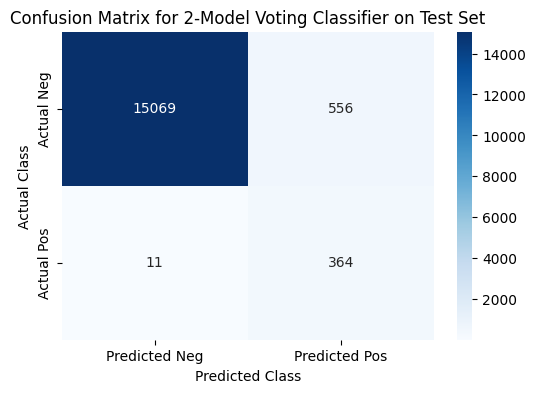

In [34]:
print("----- Creating and Evaluating a 2-Model Voting Classifier (RF + XGB) -----")

# 1. Create the ensemble using only the two best tuned estimators
voting_clf_2 = VotingClassifier(
    estimators=[
        ('random_forest', best_rf_model),
        ('xgboost', best_xgb_model)
    ],
    voting='soft', # Average probabilities for a more nuanced prediction
    n_jobs=-1
)

# 2. Train the Voting Classifier
voting_clf_2.fit(X_train_processed, y_train_encoded)

# 3. Evaluate on the test set
y_pred_test_voting_2 = voting_clf_2.predict(X_test_processed)

# Calculate final cost and confusion matrix
final_test_cost_voting_2 = total_cost(y_test_encoded, y_pred_test_voting_2)
final_cm_voting_2 = confusion_matrix(y_test_encoded, y_pred_test_voting_2, labels=[0, 1])

# Report results
print(f"\n**Final Cost on Test Set (Voting): {final_test_cost_voting_2}**")
print("\nTest Set Classification Report:")
print(classification_report(y_test_encoded, y_pred_test_voting_2))
plot_confusion_matrix(final_cm_voting_2, "2-Model Voting Classifier")

# Append results for the final summary table
test_summary_results.append({
    'Model': 'Voting Classifier (2 models)',
    'Test Set Cost': final_test_cost_voting_2,
    'False Positives (FP)': final_cm_voting_2[0, 1],
    'False Negatives (FN)': final_cm_voting_2[1, 0]
})

The score balanced between XGB and Random Forest at 11060.

##### Model 6: Ensemble 2-Model Stacking Classifier (RF + XGB)


----- Creating and Evaluating a 2-Model Stacking Classifier (RF + XGB) -----


c:\Users\User\miniconda3\envs\boost\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



**Final Cost on Test Set (Stacking): 10770**

Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     15625
           1       0.31      0.99      0.47       375

    accuracy                           0.95     16000
   macro avg       0.65      0.97      0.72     16000
weighted avg       0.98      0.95      0.96     16000



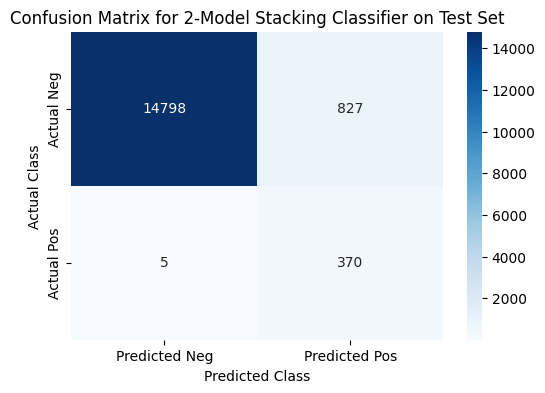

In [36]:
print("\n----- Creating and Evaluating a 2-Model Stacking Classifier (RF + XGB) -----")

# 1. Define the base models (Level 0)
estimators = [
    ('random_forest', best_rf_model),
    ('xgboost', best_xgb_model)
]

# 2. Define the meta-model (Level 1)
meta_model = LogisticRegression(solver='saga', class_weight='balanced', n_jobs=-1)

# 3. Create the Stacking Classifier
stacking_clf_2 = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

# 4. Train the Stacking Classifier
stacking_clf_2.fit(X_train_processed, y_train_encoded)

# 5. Evaluate on the test set
y_pred_test_stacking_2 = stacking_clf_2.predict(X_test_processed)

# Calculate final cost and confusion matrix
final_test_cost_stacking_2 = total_cost(y_test_encoded, y_pred_test_stacking_2)
final_cm_stacking_2 = confusion_matrix(y_test_encoded, y_pred_test_stacking_2, labels=[0, 1])

# Report results
print(f"\n**Final Cost on Test Set (Stacking): {final_test_cost_stacking_2}**")
print("\nTest Set Classification Report:")
print(classification_report(y_test_encoded, y_pred_test_stacking_2))
plot_confusion_matrix(final_cm_stacking_2, "2-Model Stacking Classifier")

# Append results for the final summary table
test_summary_results.append({
    'Model': 'Stacking Classifier (2 models)',
    'Test Set Cost': final_test_cost_stacking_2,
    'False Positives (FP)': final_cm_stacking_2[0, 1],
    'False Negatives (FN)': final_cm_stacking_2[1, 0]
})

Achieve the best score out of other models at 10770

##### Summary for Model Evaluation Test

In [38]:
print("\n--- Final Model Performance Comparison on Test Set ---")
final_summary_df = pd.DataFrame(test_summary_results).set_index('Model')
final_summary_df = final_summary_df.sort_values(by='Test Set Cost', ascending=True)

print(final_summary_df)
print("\n*Note: Lower 'Test Set Cost' indicates better performance.")


--- Final Model Performance Comparison on Test Set ---
                                Test Set Cost  False Positives (FP)  \
Model                                                                 
Stacking Classifier (2 models)          10770                   827   
XGBoost                                 10940                   494   
Voting Classifier (2 models)            11060                   556   
Random Forest                           11740                   624   
LightGBM                                21770                   127   

                                False Negatives (FN)  
Model                                                 
Stacking Classifier (2 models)                     5  
XGBoost                                           12  
Voting Classifier (2 models)                      11  
Random Forest                                     11  
LightGBM                                          41  

*Note: Lower 'Test Set Cost' indicates better performance.


In summary, the best model for this experiment is Stacking Classifier with RF and XGB models trained ensembled together. It achieves 10770 cost in challenge metric score which on par with the past usage above 2nd place and below 1st place as in the document description. The individual XGBoost model also a strong performer with the best single model.

This problem differs from common machine learning challenges as the success is not measured by accuracy, and f1-score, rather being measured by a custom specific business formula. Total_cost = 10 * FP + 500 * FN. The 50x higher penalty for FP (missing a failure) compared to FP (a needless check) is the single most important factor forcing the entire strategy to prioritize recall over precision. Additionally, the extreme class imbalance making it difficult for standard algorithms to learn minority class without specific guidance.

I strongly believe this experiment can further be refined but due to time limitation, I cannot make it. Below are the list of refinement that can be made:
- Data-Level Sampling Techniques: Instead of using model parameters to handle imbalance, we could use data resampling techniques such as SMOTE or ADASYN to generate synthetic positive sample, creating more balanced dataset for the model to train on.
- Threshold Tuning: Models output a probability score for each prediction. By default, the threshold is 0.5 to classify an instance as positive. We could systematically evaluate different threshold to find the one minimizes our specific business cost function on validation set.
- Advanced Feature Engineering: If we can understand the domain knowledge behind the data, we could engineered new features that can provide better context to the model.